## Import packages

In [1]:
!nvidia-smi

Thu Jun 10 12:04:21 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.64       Driver Version: 430.64       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  Off  | 00000000:41:00.0 Off |                  N/A |
| 29%   29C    P8     1W / 250W |  10896MiB / 11019MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce RTX 208...  Off  | 00000000:42:00.0  On |                  N/A |
| 29%   31C    P8    14W / 250W |    523MiB / 11018MiB |      1%      Default |
+-------------------------------+----------------------+----------------------+
        

In [ ]:
# install StellarGraph if running on Google Colab
import sys
if 'google.colab' in sys.modules:
  %pip install -q stellargraph[demos]==1.2.1

In [1]:
# verify that we're using the correct version of StellarGraph for this notebook
import stellargraph as sg

try:
    sg.utils.validate_notebook_version("1.2.1")
except AttributeError:
    raise ValueError(
        f"This notebook requires StellarGraph version 1.2.1, but a different version {sg.__version__} is installed.  Please see <https://github.com/stellargraph/stellargraph/issues/1172>."
    ) from None

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import os
import math
import matplotlib.pyplot as plt
import numpy as np
from stellargraph import StellarGraph

import pandas as pd
import numpy as np

import stellargraph as sg
from stellargraph.mapper import PaddedGraphGenerator
from stellargraph.layer import DeepGraphCNN
from stellargraph import StellarGraph

from stellargraph import datasets

from sklearn import model_selection
from IPython.display import display, HTML

from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Dropout, Flatten,  BatchNormalization
from tensorflow.keras.losses import binary_crossentropy, categorical_crossentropy
import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Define Hyperparameters

In [3]:
# classes = ['diijam', 'baomoi', 'fptplay', 'iQIYI', 'bigo', 'myradio', 'spotify', 'nhaccuatui', 'soundcloud', 'sachnoiapp', 'phim247', 'popskid',
#            'truyenaudiosachnoiviet', 'vieon', 'voizfm', 'tunefm', 'wetv', 'zingmp3', 'truyenaudio', 'baohay24h', 'freefire', 'among_us', 'azar', 'comico', 'nimotv',
#            'mangatoon', 'medoctruyen', 'nhacvang', 'noveltoon', 'radiofm', 'tivi247', 'vtvgo', 'tivi24h', 'tinder', 'tinmoi24h', 'tivi360',
#            'tiktok', 'linkedin', 'tiki', 'tinhte', 'lotus', 'tivi_truyentranh_webtoon', 'tuoitre_online', 'vietnamworks', 'wallstreet_journal', 'cnn_news', 'bbc_news',
#            'twitter', 'weeboo', 'twitch', 'vnexpress', 'topcv', 'toc_chien', 'wesing', 'hago', 'google_meet', 'dubsmash', 'facebook',
#            'hahalolo', 'zalo', 'hello_yo', 'dan_tri', 'zoom', 'wikipedia', 'instagram', 'jobway', 'kaka', 'pinterest', 'quora', 'lazada', 'chess', 'cake', 'mobile_legend', 'co_tuong_online',
#            'ted', 'telegram', 'starmarker', 'skype', 'soha', 'tango', 'thanhnien', 'snapchat', 'tien_len', 'animal_restaurant', 'bida', 'cho_tot', 'messenger', 'netflix', 'nonolive', 'ola_party', 'may',
#            'podcast_player', 'pubg', 'partying', 'kenh14', 'lienquan_mobile', 'likee_lite', 'reddit', 'sendo', 'shopee', 'the_guardian']
classes = ['diijam', 'baomoi', 'fptplay', 'iQIYI', 'bigo', 'myradio', 'spotify', 'nhaccuatui', 'soundcloud', 'sachnoiapp', 'phim247', 'popskid',
           'truyenaudiosachnoiviet', 'vieon', 'voizfm', 'tunefm', 'wetv', 'zingmp3', 'truyenaudio', 'baohay24h', 'freefire', 'among_us', 'azar', 'comico', 'nimotv',
           'mangatoon', 'medoctruyen', 'nhacvang', 'noveltoon', 'radiofm', 'tivi247', 'vtvgo', 'tivi24h', 'tinder', 'tinmoi24h', 'tivi360',
           'tiktok', 'linkedin', 'tiki', 'tinhte', 'lotus', 'tivi_truyentranh_webtoon', 'tuoitre_online', 'vietnamworks', 'wallstreet_journal', 'cnn_news', 'bbc_news',
           'twitter', 'weeboo', 'twitch', 'vnexpress', 'topcv', 'toc_chien', 'wesing', 'hago', 'google_meet', 'dubsmash', 'facebook',
           'hahalolo', 'zalo', 'hello_yo', 'dan_tri', 'zoom', 'wikipedia', 'instagram', 'jobway', 'kaka', 'pinterest', 'quora', 'lazada', 'chess', 'cake', 'mobile_legend', 'co_tuong_online',
           'ted', 'telegram', 'starmarker', 'skype', 'soha', 'tango', 'thanhnien', 'snapchat', 'tien_len', 'animal_restaurant', 'bida', 'cho_tot', 'messenger', 'netflix', 'nonolive', 'may',
           'podcast_player', 'pubg', 'partying', 'kenh14', 'lienquan_mobile', 'likee_lite', 'reddit', 'sendo', 'shopee', 'the_guardian', 'ola_party']

# classes = ['diijam']
           
k = 10  # the number of rows for the output tensor (k = 10, 20)
len(classes)

101

In [4]:
chosen_features = ['IP_port',  'complete_max', 'complete_min','complete_mean',
       'complete_mad', 'complete_std', 'complete_var', 'complete_skew',
       'complete_kurt', 'complete_pkt_num',   'out_max', 'out_min','out_mean', 'out_mad', 'out_std', 'out_var', 'out_skew',
       'out_kurt', 'out_pkt_num',  'in_max', 'in_min', 'in_mean', 'in_mad', 'in_std',
       'in_var', 'in_skew', 'in_kurt', 'in_pkt_num', 'protocol', 'flows_num', 'flow_length_mean',
       'flow_pkt_num_mean', 'flow_duration_mean', 'ip1', 'ip2', 'ip3', 'ip4',
        'complete_20per', 'complete_40per', 'complete_60per', 'complete_80per',
        'out_20per', 'out_40per', 'out_60per', 'out_80per', 'in_20per', 'in_40per', 'in_60per', 'in_80per',
       'graph_id']

unused_features = [
         'complete_10per', 
       'complete_30per',  'complete_50per', 
       'complete_70per',  'complete_90per',
         'out_10per',  'out_30per',
        'out_50per',  'out_70per',
       'out_90per',  'in_10per', 
       'in_30per',  'in_50per',  'in_70per', 
       'in_90per'
       ]

In [5]:
train_graphs_folder = '/home/tram/moapp-gnn/train_graphs/N20/t10'
test_graphs_folder = '/home/tram/moapp-gnn/test_graphs/N20/t10'
models_folder = '/home/tram/moapp-gnn/models'

## Generate data

In [6]:
def graphs_one_app(app, graphs_folder):
  graphs = []

  app_graph_folder = os.path.join(graphs_folder, app)
  features_path = os.path.join(app_graph_folder, 'features.csv')
  weights_path = os.path.join(app_graph_folder, 'weights.csv')

  features_df = pd.read_csv(features_path, index_col=0)
  weights_df = pd.read_csv(weights_path, index_col=0)

  graph_num = features_df['graph_id'].iloc[-1]

  for i in range(1, graph_num+1):
    feature_df = features_df[features_df['graph_id'] == i]
    feature_df = feature_df.set_index('IP_port')
    
    weight_df = weights_df[weights_df['graph_id'] == i].reset_index(drop=True)

    # drop graph_id column
    feature_df = feature_df.drop(['graph_id'], axis=1)
    weight_df = weight_df.drop(['graph_id'], axis=1)

    if weight_df.shape[0] > 0:
      graph = StellarGraph(feature_df, weight_df)
      graphs.append(graph)
    # graph = StellarGraph(feature_df)
    # graphs.append(graph)

    if i >= 100 and i % 100 == 0:
      print('Graph: ', i)
  
  labels = [app]*graph_num
    
  return graphs, labels

In [7]:
def generate_graphs(graphs_folder):
  # build a list of graphs and labels: note that only apply for more than 2 classes
  li = []
  labels = []
  idx = 0

  for app in classes:
    idx += 1
    print('Loading {} ... {}/{}'.format(app, idx, len(classes)))
    
    one_app_graphs, one_app_labels = graphs_one_app(app, graphs_folder)
    li.extend(one_app_graphs)
    labels.extend(one_app_labels)
    

  graph_labels = pd.get_dummies(labels)
  graphs = li

  return graphs, graph_labels, labels

Load graphs from csv files



In [8]:
train_graphs, train_graph_labels, _ = generate_graphs(train_graphs_folder)
validation_graphs, validation_graph_labels, _ = generate_graphs(test_graphs_folder)

train_size = len(train_graphs)

train_graphs.extend(validation_graphs)
graphs = train_graphs
graph_labels = train_graph_labels.append(validation_graph_labels, ignore_index=True)

# seperate training folder and testing folder
train_graphs, train_graph_labels = graphs[:train_size],  graph_labels[:train_size]
test_graphs, test_graph_labels = graphs[train_size:], graph_labels[train_size:]

Loading diijam ... 1/101
Graph:  100
Graph:  200
Graph:  300
Loading baomoi ... 2/101
Graph:  100
Graph:  200
Graph:  300
Graph:  400
Graph:  500
Graph:  600
Loading fptplay ... 3/101
Graph:  100
Graph:  200
Graph:  300
Graph:  400
Graph:  500
Loading iQIYI ... 4/101
Graph:  100
Graph:  200
Graph:  300
Graph:  400
Graph:  500
Graph:  600
Graph:  700
Loading bigo ... 5/101
Graph:  100
Graph:  200
Graph:  300
Graph:  400
Graph:  500
Graph:  600
Graph:  700
Graph:  800
Graph:  900
Loading myradio ... 6/101
Graph:  100
Graph:  200
Graph:  300
Graph:  400
Loading spotify ... 7/101
Graph:  100
Graph:  200
Graph:  300
Graph:  400
Graph:  500
Graph:  600
Graph:  700
Graph:  800
Loading nhaccuatui ... 8/101
Graph:  100
Graph:  200
Graph:  300
Graph:  400
Graph:  500
Graph:  600
Graph:  700
Graph:  800
Graph:  900
Graph:  1000
Graph:  1100
Graph:  1200
Loading soundcloud ... 9/101
Graph:  100
Graph:  200
Graph:  300
Graph:  400
Graph:  500
Graph:  600
Graph:  700
Graph:  800
Loading sachnoiapp .

Graph:  600
Graph:  700
Loading tien_len ... 83/101
Graph:  100
Graph:  200
Graph:  300
Graph:  400
Graph:  500
Graph:  600
Graph:  700
Loading animal_restaurant ... 84/101
Graph:  100
Graph:  200
Graph:  300
Graph:  400
Graph:  500
Loading bida ... 85/101
Graph:  100
Graph:  200
Graph:  300
Graph:  400
Graph:  500
Graph:  600
Graph:  700
Loading cho_tot ... 86/101
Graph:  100
Graph:  200
Graph:  300
Graph:  400
Graph:  500
Graph:  600
Graph:  700
Loading messenger ... 87/101
Graph:  100
Graph:  200
Graph:  300
Graph:  400
Graph:  500
Graph:  600
Loading netflix ... 88/101
Graph:  100
Graph:  200
Graph:  300
Graph:  400
Graph:  500
Graph:  600
Loading nonolive ... 89/101
Graph:  100
Graph:  200
Graph:  300
Graph:  400
Graph:  500
Graph:  600
Graph:  700
Loading may ... 90/101
Graph:  100
Graph:  200
Graph:  300
Graph:  400
Graph:  500
Loading podcast_player ... 91/101
Graph:  100
Graph:  200
Graph:  300
Graph:  400
Graph:  500
Graph:  600
Loading pubg ... 92/101
Graph:  100
Graph:  200

In [9]:
generator = PaddedGraphGenerator(graphs=graphs)

## Build GNN

In [10]:
layer_sizes = [1024, 1024, 1024, 512]

dgcnn_model = DeepGraphCNN(
    layer_sizes=layer_sizes,
    activations=["tanh", "tanh", "tanh", "tanh"],
    k=k,
    bias=False,
    generator=generator,
    # generator=None,
)
x_inp, x_out = dgcnn_model.in_out_tensors()

######################-----------------------------------########################
x_out = Conv1D(filters=256, kernel_size=sum(layer_sizes), strides=sum(layer_sizes))(x_out)
x_out = MaxPool1D(pool_size=2)(x_out)

# x_out = Conv1D(filters=512, kernel_size=5, strides=1)(x_out)
x_out = Conv1D(filters=512, kernel_size=3, strides=1)(x_out)

x_out = Flatten()(x_out)

x_out = Dense(units=1024, activation="relu")(x_out)
x_out = Dropout(rate=0.25)(x_out)

predictions = Dense(units=len(classes), activation="softmax")(x_out)

######################-----------------------------------#######################

model = Model(inputs=x_inp, outputs=predictions)

# using exponentialDecay to decrease the learning rate after 10 epochs
# lr =  initial_lr * decay_rate ^ (step / decay_steps)
batch_size = 256
decay_epoch = 20

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=(train_size//batch_size)*decay_epoch,
    decay_rate=0.9)
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(
    optimizer=optimizer, loss=categorical_crossentropy, metrics=["acc"],
)

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, 63)]   0                                            
__________________________________________________________________________________________________
dropout (Dropout)               (None, None, 63)     0           input_1[0][0]                    
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, None, None)] 0                                            
__________________________________________________________________________________________________
graph_convolution (GraphConvolu (None, None, 1024)   64512       dropout[0][0]                    
                                                                 input_3[0][0]                

In [12]:
gen = PaddedGraphGenerator(graphs=graphs)

train_gen = gen.flow(
    list(train_graph_labels.index - 1),
    targets=train_graph_labels.values,
    batch_size=256,
    symmetric_normalization=False,
)

test_gen = gen.flow(
    list(test_graph_labels.index - 1),
    targets=test_graph_labels.values,
    # batch_size=1,
    batch_size=256,
    symmetric_normalization=False,
)

## Training

In [13]:
class CustomSaver(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if epoch % 10 == 0 & epoch > 0:  # or save after some epoch, each k-th epoch etc.
            self.model.save(os.path.join(models_folder, "model_{}.hd5".format(epoch)))
# create and use callback:
saver = CustomSaver()

epochs = 150
history = model.fit(
    train_gen, callbacks=[saver], epochs=epochs, verbose=1, validation_data=test_gen, shuffle=True,
)

Epoch 1/150
259/259 [==============================] - 55s 212ms/step - loss: 4.4680 - acc: 0.0461 - val_loss: 3.7302 - val_acc: 0.1310
Epoch 2/150
259/259 [==============================] - 54s 207ms/step - loss: 3.5867 - acc: 0.1504 - val_loss: 2.8437 - val_acc: 0.3035
Epoch 3/150
259/259 [==============================] - 54s 208ms/step - loss: 2.9294 - acc: 0.2598 - val_loss: 2.3725 - val_acc: 0.4072
Epoch 4/150
259/259 [==============================] - 53s 206ms/step - loss: 2.5261 - acc: 0.3485 - val_loss: 2.1195 - val_acc: 0.4674
Epoch 5/150
259/259 [==============================] - 54s 208ms/step - loss: 2.1935 - acc: 0.4319 - val_loss: 1.9333 - val_acc: 0.5062
Epoch 6/150
259/259 [==============================] - 54s 209ms/step - loss: 2.0206 - acc: 0.4604 - val_loss: 1.7584 - val_acc: 0.5375
Epoch 7/150
259/259 [==============================] - 55s 211ms/step - loss: 1.7936 - acc: 0.5239 - val_loss: 1.4720 - val_acc: 0.6085
Epoch 8/150
259/259 [===========================

Epoch 61/150
259/259 [==============================] - 54s 210ms/step - loss: 0.3701 - acc: 0.8928 - val_loss: 0.4548 - val_acc: 0.8928
Epoch 62/150
259/259 [==============================] - 54s 210ms/step - loss: 0.3593 - acc: 0.8958 - val_loss: 0.4482 - val_acc: 0.8952
Epoch 63/150
259/259 [==============================] - 54s 210ms/step - loss: 0.3495 - acc: 0.8980 - val_loss: 0.4771 - val_acc: 0.8878
Epoch 64/150
259/259 [==============================] - 55s 210ms/step - loss: 0.3530 - acc: 0.8982 - val_loss: 0.4844 - val_acc: 0.8867
Epoch 65/150
259/259 [==============================] - 54s 210ms/step - loss: 0.3447 - acc: 0.8988 - val_loss: 0.4339 - val_acc: 0.9001
Epoch 66/150
259/259 [==============================] - 55s 210ms/step - loss: 0.3247 - acc: 0.9066 - val_loss: 0.4816 - val_acc: 0.8864
Epoch 67/150
259/259 [==============================] - 54s 210ms/step - loss: 0.3449 - acc: 0.8991 - val_loss: 0.4474 - val_acc: 0.8980
Epoch 68/150
259/259 [===================

259/259 [==============================] - 54s 209ms/step - loss: 0.1092 - acc: 0.9653 - val_loss: 0.4108 - val_acc: 0.9272
Epoch 121/150
259/259 [==============================] - 54s 207ms/step - loss: 0.1019 - acc: 0.9681 - val_loss: 0.4228 - val_acc: 0.9275
Epoch 122/150
259/259 [==============================] - 54s 208ms/step - loss: 0.1047 - acc: 0.9661 - val_loss: 0.4129 - val_acc: 0.9279
Epoch 123/150
259/259 [==============================] - 54s 209ms/step - loss: 0.1009 - acc: 0.9681 - val_loss: 0.4342 - val_acc: 0.9262
Epoch 124/150
259/259 [==============================] - 54s 209ms/step - loss: 0.0952 - acc: 0.9706 - val_loss: 0.4237 - val_acc: 0.9273
Epoch 125/150
259/259 [==============================] - 54s 209ms/step - loss: 0.0997 - acc: 0.9681 - val_loss: 0.4284 - val_acc: 0.9272
Epoch 126/150
259/259 [==============================] - 54s 210ms/step - loss: 0.1006 - acc: 0.9679 - val_loss: 0.4301 - val_acc: 0.9262
Epoch 127/150
259/259 [=========================

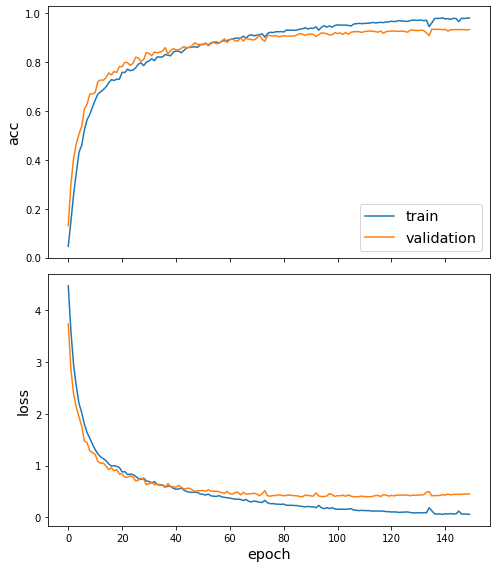

In [14]:
sg.utils.plot_history(history)

## Testing

In [15]:
pred_prob = model.predict(test_gen)
pred_labels = np.argmax(pred_prob, axis=-1) 
pred_labels = [str(x+1) for x in list(pred_labels)]

test_labels = np.argmax(test_graph_labels.values, axis=-1)
test_labels = [str(x+1) for x in list(test_labels)]

print(classification_report(test_labels, pred_labels, target_names=classes, digits=4))

                          precision    recall  f1-score   support

                  diijam     0.9627    0.9748    0.9687       159
                  baomoi     0.9253    0.9200    0.9226       175
                 fptplay     0.9615    0.9653    0.9634       259
                   iQIYI     0.9153    0.9643    0.9391       168
                    bigo     0.9454    0.9454    0.9454       183
                 myradio     0.9638    0.9433    0.9534       141
                 spotify     0.9328    0.9058    0.9191       138
              nhaccuatui     0.9126    0.9176    0.9151       182
              soundcloud     0.8967    0.8919    0.8943       185
              sachnoiapp     0.8981    0.9151    0.9065       106
                 phim247     0.9653    0.8910    0.9267       156
                 popskid     0.9474    0.9524    0.9499       189
  truyenaudiosachnoiviet     0.9649    0.9565    0.9607       115
                   vieon     0.8915    0.8712    0.8812       132
         

-------------------------------------------------------------